<a href="https://colab.research.google.com/github/rachanabs1485/ds_rachana/blob/main/DStask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install gdown to download from Google Drive (optional)
!pip install gdown --quiet

# Install essential packages (usually pre-installed in Colab)
!pip install pandas matplotlib seaborn scikit-learn --quiet


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Hyperliquid_Trader_Historical.csv.csv to Hyperliquid_Trader_Historical.csv.csv


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Bitcoin_Fear_Greed_Index.csv.csv to Bitcoin_Fear_Greed_Index.csv.csv


In [ ]:
import os

print("Files in /content:")
print(os.listdir())



Files in /content:
['.config', 'Bitcoin_Fear_Greed_Index.csv.csv', 'Hyperliquid_Trader_Historical.csv.csv', 'sample_data']


In [25]:
import pandas as pd

# Use the exact filename from os.listdir()
df = pd.read_csv("Hyperliquid_Trader_Historical.csv.csv")
df = pd.read_csv("Bitcoin_Fear_Greed_Index.csv.csv")   # Example
df.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
import pandas as pd

# Use the exact filename from os.listdir()
df = pd.read_csv("Hyperliquid_Trader_Historical.csv.csv")  # Example
df = pd.read_csv("Bitcoin_Fear_Greed_Index.csv.csv")  # Example
df.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
# Install gdown to download from Google Drive (optional)
!pip install gdown --quiet

# Install essential packages (usually pre-installed in Colab)
!pip install pandas matplotlib seaborn scikit-learn --quiet


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load your uploaded CSV files (make sure names match exactly)
trades_df = pd.read_csv('Hyperliquid_Trader_Historical.csv.csv')
sentiment_df = pd.read_csv('Bitcoin_Fear_Greed_Index.csv.csv')

# Preview data
trades_df.head(), sentiment_df.head()


(                                      Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
 3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
 4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   
 
    Closed PnL                                   Transaction Hash     Order ID  \
 0      

In [ ]:
# Convert dates to datetime
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Clean up column names in trades_df (remove leading/trailing whitespace)
trades_df.columns = trades_df.columns.str.strip()

trades_df['Timestamp IST'] = pd.to_datetime(trades_df['Timestamp IST'], format="%d-%m-%Y %H:%M")

# Create 'Date' column in trades for merging
trades_df['Date'] = trades_df['Timestamp IST'].dt.date
trades_df['Date'] = pd.to_datetime(trades_df['Date'])

# Convert sentiment to binary
sentiment_df['Sentiment'] = sentiment_df['classification'].map({'Fear': 0, 'Extreme Fear': 0, 'Neutral': 0.5, 'Greed': 1, 'Extreme Greed': 1})


# Merge data on Date
merged_df = pd.merge(trades_df, sentiment_df[['date', 'Sentiment']], left_on='Date', right_on='date', how='left')
merged_df.dropna(subset=['Sentiment'], inplace=True)

# Calculate profit (you may already have this column)
# Based on the head() output, 'Closed PnL' is the column to use
merged_df['Profit'] = merged_df['Closed PnL']

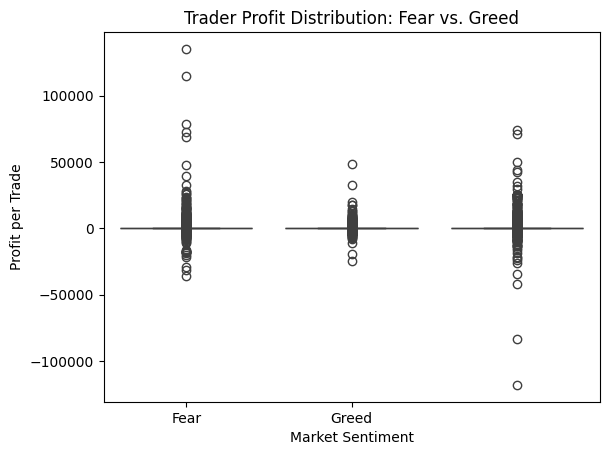

In [ ]:
sns.boxplot(data=merged_df, x='Sentiment', y='Profit')
plt.xticks([0, 1], ['Fear', 'Greed'])
plt.title("Trader Profit Distribution: Fear vs. Greed")
plt.xlabel("Market Sentiment")
plt.ylabel("Profit per Trade")
plt.show()


In [ ]:
account_pnl = merged_df.groupby(['Account', 'Sentiment'])['Profit'].mean().unstack()

# Rename columns to be more descriptive
account_pnl.columns = ['Avg_PnL_Fear', 'Avg_PnL_Neutral', 'Avg_PnL_Greed']

# Calculate the difference in PnL between Greed and Fear
account_pnl['PnL_Diff_Greed_Fear'] = account_pnl['Avg_PnL_Greed'] - account_pnl['Avg_PnL_Fear']

# Display the accounts with the largest difference in PnL (Greed vs Fear)
account_pnl.sort_values(by='PnL_Diff_Greed_Fear', ascending=False).head()

,Avg_PnL_Fear,Avg_PnL_Neutral,Avg_PnL_Greed,PnL_Diff_Greed_Fear
Account,,,,
0x72743ae2822edd658c0c50608fd7c5c501b2afbd,-29.560673,0.000000,656.433167,685.993840
0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0,-360.835964,-13.407838,248.849115,609.685079
0x430f09841d65beb3f27765503d0f850b8bce7713,17.769152,440.010296,447.224194,429.455042
0x6d6a4b953f202f8df5bed40692e7fd865318264a,8.122744,20.624933,250.959898,242.837154
0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,-110.664518,-37.239609,104.411376,215.075893


In [ ]:
fear_pnl = merged_df[merged_df['Sentiment'] == 0]['Profit']
greed_pnl = merged_df[merged_df['Sentiment'] == 1]['Profit']

t_stat, p_val = ttest_ind(greed_pnl, fear_pnl, equal_var=False)
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("✅ Significant difference in trader performance between Fear and Greed markets.")
else:
    print("❌ No significant difference found.")



T-statistic: 0.99
P-value: 0.3234
❌ No significant difference found.


In [ ]:
account_pnl.to_csv("account_sentiment_summary.csv")
merged_df.to_csv("merged_trading_sentiment_data.csv", index=False)
